#### Package Dependencies

In [48]:
import os, sys
from pathlib import Path
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from tqdm import tqdm

from datetime import date
import warnings
warnings.filterwarnings('ignore')
# display options
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)

sns.set_style('ticks') # set default plot style
colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colors) # set custom color scheme
plt.rcParams['figure.figsize'] = (9, 6)

In [ ]:
#### Define color palette
vibrant_color_palette = [
    '#e6194b',  # Red
    '#3cb44b',  # Green
    '#ffe119',  # Yellow
    '#0082c8',  # Blue
    '#f58231',  # Orange
    '#911eb4',  # Purple
    '#46f0f0',  # Cyan
    '#f032e6',  # Magenta
    '#d2f53c',  # Lime
    '#fabebe',  # Pink
]

pastle_color_palette = [
    '#FFB6C1',  # Light Pink
    '#FFB3DE',  # Light Lavender
    '#FFCC99',  # Peach
    '#99FF99',  # Mint Green
    '#B3E0FF',  # Baby Blue
    '#FFB3E6',  # Light Rose
    '#FFCCFF',  # Lavender Blush
    '#E6E6FA',  # Lavender
    '#FADADD',  # Light Pink
    '#D1E231',  # Pastel Yellow
]

#### Load Tables

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

print("Inspect training set:")
display(df_train)
print("Inspect test set:")
display(df_test)
print("Inspect submission table:")
display(df_submission)

Inspect training set:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


Inspect test set:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


Inspect submission table:


,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437
...,...,...
249995,999995,45.437
249996,999996,45.437
249997,999997,45.437
249998,999998,45.437


#### Descriptive Data Analysis

In [45]:
train_null = df_train.isnull().sum().to_dict()
test_null = df_test.isnull().sum().to_dict()

train_null = pd.DataFrame(train_null, index=[0]) ### index=[0], specify how many rows you want to make
test_null = pd.DataFrame(test_null, index=[0])

print("Sanity check on training and test set")
print("**********************************************************************************************************************************************************")
#### Sanity check on training and test set
print("Training set:")
print(f"Total row count: {df_train['id'].count()} rows")
print(f"Unique ID count: {df_train['id'].nunique()}")
print("Null values counts:")
display(train_null)

print("**********************************************************************************************************************************************************")
print("Test set:")
print(f"Total row count: {df_test['id'].count()} rows")
print(f"Unique ID count: {df_test['id'].nunique()}")
print("Null values counts:")
display(test_null)

print("**********************************************************************************************************************************************************")
print("Check Data Types")
train_dtypes = df_train.dtypes.to_dict()
train_dtypes = pd.DataFrame(train_dtypes, index=[0])
display(train_dtypes)

Sanity check on training and test set
**********************************************************************************************************************************************************
Training set:
Total row count: 750000 rows
Unique ID count: 750000
Null values counts:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,0,0,87093,0,0,0,0,146030,1,0,0


**********************************************************************************************************************************************************
Test set:
Total row count: 250000 rows
Unique ID count: 250000
Null values counts:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,0,0,0,28736,0,0,0,0,48832,0,0


**********************************************************************************************************************************************************
Check Data Types


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,int64,object,object,float64,object,float64,object,object,float64,float64,object,float64


In [ ]:
# Check columns null percentage for training and test set
train_null_perc = df_train.isna().sum() / len(df_train)
test_null_perc = df_test.isna().sum() / len(df_test)

# write de 
null_comparison = pd.DataFrame({
    'train_null_proportion': train_null_perc,
    'test_null_proportion': test_null_perc
})

null_comparison = null_comparison.sort_values(by=['train_null_proportion', 'test_null_proportion'], ascending=False)
display(null_comparison)

In [44]:
print("Looking into the data description:")
df_train.describe()

Looking into the data description:


,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [46]:
from dabl import detect_types # useful for data exploration, from tutorial

detected = detect_types(df_train)
detected

/Users/kaylafei/anaconda3/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/Users/kaylafei/anaconda3/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/Users/kaylafei/anaconda3/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/Users/kaylafei/anaconda3/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer f

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
id,False,False,False,False,False,False,False,True
Podcast_Name,False,False,False,False,True,False,False,False
Episode_Title,False,False,False,False,True,False,False,False
Episode_Length_minutes,True,False,False,False,False,False,False,False
Genre,False,False,False,False,True,False,False,False
Host_Popularity_percentage,True,False,False,False,False,False,False,False
Publication_Day,False,False,False,False,True,False,False,False
Publication_Time,False,False,False,False,True,False,False,False
Guest_Popularity_percentage,True,False,False,False,False,False,False,False
Number_of_Ads,True,False,False,False,False,False,False,False


In [64]:
lst_continuous = detected[detected['continuous'] == True].index.to_list()
print(lst_continuous)

lst_numerical = list(set(lst_continuous) - set(['Episode_Length_minutes']))
print(lst_numerical)

lst_categorical = detected[detected['categorical'] == True].index.to_list()
print(lst_categorical)

['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']
['Guest_Popularity_percentage', 'Listening_Time_minutes', 'Host_Popularity_percentage', 'Number_of_Ads']
['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


In [59]:
#### define distribution plots
def distplots(X, kde=True):
    labels = list(X.columns)
    N, p = X.shape
    rows = int(np.ceil(p/3)) 
    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))
    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.histplot(X.iloc[:,i], ax=ax, stat='density', kde=False, alpha= 0.9, edgecolor ='black')
            sns.kdeplot(X.iloc[:,i], ax=ax, alpha= 0.0, color='#333333')
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fig, axes

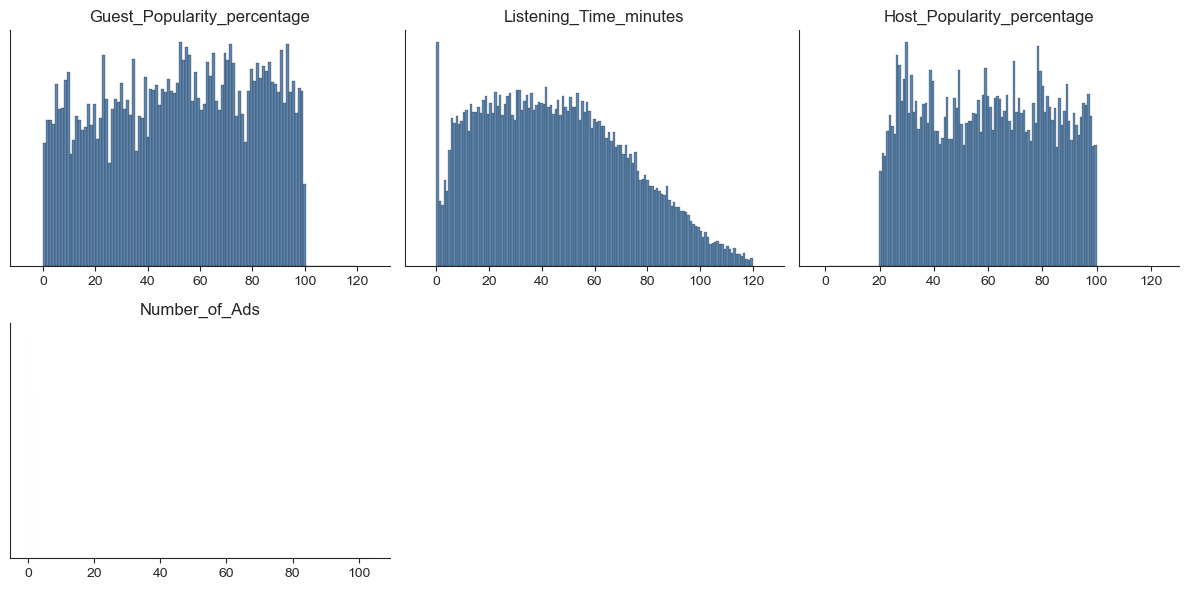

(<Figure size 1200x600 with 4 Axes>,
 array([[<Axes: title={'center': 'Guest_Popularity_percentage'}>,
         <Axes: title={'center': 'Listening_Time_minutes'}>,
         <Axes: title={'center': 'Host_Popularity_percentage'}>],
        [<Axes: title={'center': 'Number_of_Ads'}>, <Axes: >, <Axes: >]],
       dtype=object))

In [60]:
distplots(df_train[lst_numerical])

In [70]:
lst_categorical

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [96]:
len(df_train['Podcast_Name'].value_counts().index.to_list())
podcast = df_train['Podcast_Name'].value_counts().head(5)
genre = df_train['Publication_Time'].value_counts()
genre

Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64

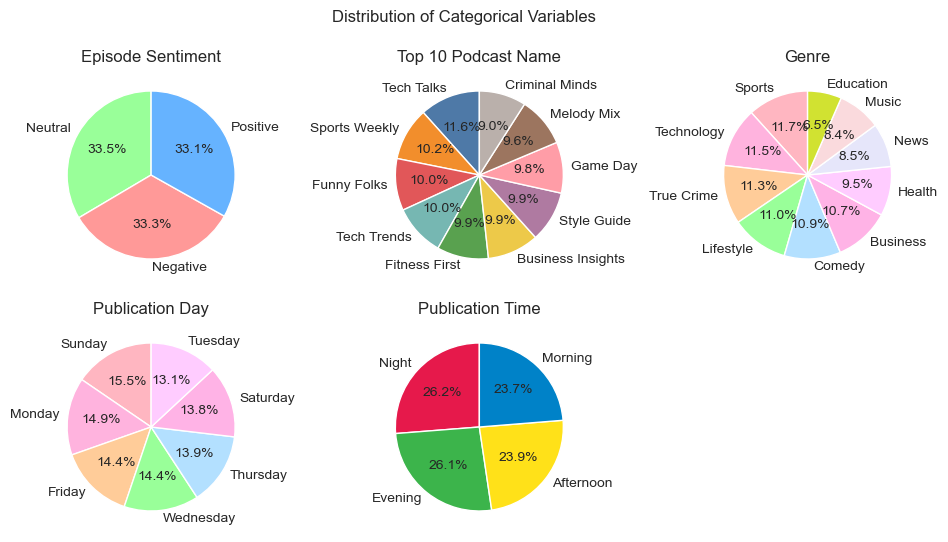

In [106]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sentiment_train = df_train['Episode_Sentiment'].value_counts()
plt.pie(sentiment_train, labels = sentiment_train.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=['#99ff99', '#ff9998', '#66b3ff'])
plt.title('Episode Sentiment')

plt.subplot(2,3,2)
podcast = df_train['Podcast_Name'].value_counts().head(10)
plt.pie(podcast, labels = podcast.index, autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Top 10 Podcast Name')

plt.subplot(2,3,3)
genre = df_train['Genre'].value_counts()
plt.pie(genre, labels = genre.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=pastle_color_palette)
plt.title('Genre')

plt.subplot(2,3,4)
publication_day = df_train['Publication_Day'].value_counts()
plt.pie(publication_day, labels = publication_day.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=pastle_color_palette)
plt.title('Publication Day')

plt.subplot(2,3,5)
publication_time = df_train['Publication_Time'].value_counts()
plt.pie(publication_time, labels = publication_time.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=vibrant_color_palette)
plt.title('Publication Time')

plt.suptitle('Distribution of Categorical Variables')
plt.show()

In [ ]:
df_train

#### Continuous Variables

In [108]:
lst_continuous

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

In [113]:
df_train[lst_continuous].isnull().sum()

Episode_Length_minutes          87093
Host_Popularity_percentage          0
Guest_Popularity_percentage    146030
Number_of_Ads                       0
Listening_Time_minutes              0
dtype: int64

In [117]:
### Dealing with NULL values: fill with mean value, by inter
df_train['Episode_Length_minutes'] = df_train['Episode_Length_minutes'].fillna(value = df_train['Episode_Length_minutes'].mean()).astype(float)
df_train['Number_of_Ads'] = df_train['Number_of_Ads'].interpolate(method='polynomial', order=2).astype(int)

df_test['Episode_Length_minutes'] = df_test['Episode_Length_minutes'].fillna(value = df_test['Episode_Length_minutes'].mean()).astype(float)
df_test['Number_of_Ads'] = df_test['Number_of_Ads'].interpolate(method='polynomial', order=2).astype(int)

In [134]:
# from sklearn.impute import KNNImputer
# ### utilize a KNN imputer: fill in missing data by leveraging the values of similar data points (or neighbors) in a dataset

# ### Create KNN imputer instance with 3 nearest neighbors
# imputer = KNNImputer(n_neighbors = 3)
# print("KNN imputer instance defined")

# # Fit on training data
# df_train[['Guest_Popularity_percentage']] = imputer.fit_transform(df_train[['Guest_Popularity_percentage']])
# print("Training set KNN impute complete...")

# # Transform test data using the same imputer
# df_test[['Guest_Popularity_percentage']] = imputer.transform(df_test[['Guest_Popularity_percentage']])
# print("Testing set KNN impute complete...")

df_train['Guest_Popularity_percentage'] = df_train['Guest_Popularity_percentage'].interpolate(method='polynomial', order=3).astype(float)
df_test['Guest_Popularity_percentage'] = df_test['Guest_Popularity_percentage'].interpolate(method='polynomial', order=3).astype(float)

df_train['Guest_Popularity_percentage'] = df_train['Guest_Popularity_percentage'].fillna(0).astype(float)

In [135]:
df_train['Guest_Popularity_percentage'].isnull().sum()

0

In [130]:
df_train[df_train['Guest_Popularity_percentage'].isnull()]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,64.504738,True Crime,74.81,Thursday,Night,NaN,0,Positive,31.41998


In [165]:
def make_loadings(pca_fit, df_feats):
    """
    Builds a dataframe of PCA loadings for each feature used in PCA
    Args:
        - pca_fit: a sklearn PCA instance that has been fit to your data
        - df_feats: the dataframe of features on which PCA was performed
    Returns:
        - loadings_df: a dataframe with features as the index, PCA components as the columns, and loadings as the cells
    """
    loadings = pca_fit.components_
    num_pc = pca_fit.n_features_in_
    pc_list = ['PC' + str(i) for i in list(range(1, num_pc + 1))]
    loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
    loadings_df['Feature'] = df_feats.columns
    loadings_df = loadings_df.set_index('Feature')
    return loadings_df

def plot_pc_loadings(loadings_df, figsize=(12,6)):
    """
    Plots a colored heatmap with a diverging red (-1) to blue (1) color map of PCA loadings
    """
    plt.figure(figsize=figsize)
    sns.heatmap(loadings_df, vmin=-1, vmax=1, annot=True, cmap ='coolwarm_r')
    plt.show()

def scree_plot(pca_fit):
    """
    Plots a scree plot of the variance explained by principal component
    Args:
        - pca_fit: a sklearn PCA instance that has been fit to your data
    Returns: None
    """
    plt.figure(figsize=(6,6))
    plt.plot(range(1, pca_fit.n_components_ + 1), pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='red')
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of Variance Explained')

In [162]:
lst_continuous

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

st_scaler_pca = StandardScaler()

pca_cols = ['Episode_Length_minutes','Host_Popularity_percentage','Number_of_Ads','Guest_Popularity_percentage']
scaled_features = pd.DataFrame(columns = pca_cols, data = st_scaler_pca.fit_transform(df_train[pca_cols].values))

pca = PCA(n_components=3)
pca.fit(scaled_features)

PCA(n_components=3)

,PC1,PC2,PC3
Feature,,,
Episode_Length_minutes,0.655397,-0.143178,-0.168548
Host_Popularity_percentage,0.399770,0.541960,0.734450
Number_of_Ads,-0.640631,0.172540,0.299737
Guest_Popularity_percentage,-0.015170,0.809944,-0.585092


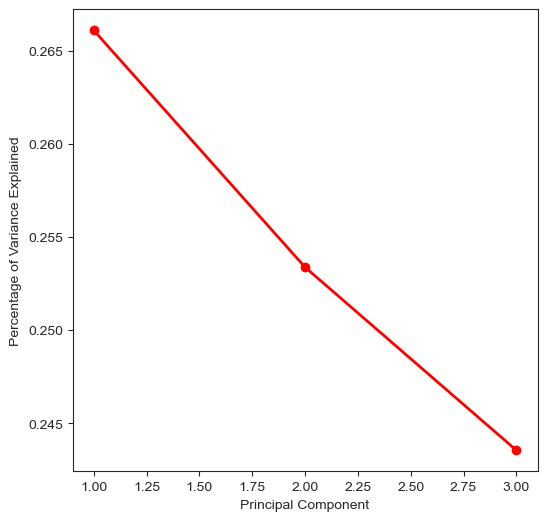

In [166]:
scree_plot(pca)
pca_loadings = make_loadings(pca, scaled_features)
pca_loadings